In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.layers as tfl
from PIL import Image
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.utils import to_categorical

In [38]:
BATCH_SIZE = 32
IMG_SIZE = (30, 30)
directory = "D:\machine learning/Traffic-signs/archive 2/Train"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             label_mode='categorical',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             label_mode='categorical',
                                             subset='validation',seed=42)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

42


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

40


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

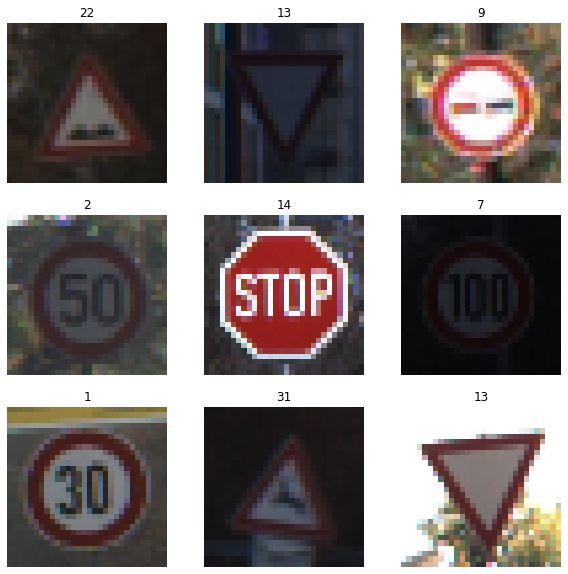

In [90]:
class_names = train_dataset.class_names
print(class_names)
plt.figure(figsize = (10,10))
for image, label in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        print(np.argmax(label[i],axis=-1))
        plt.title(class_names[np.argmax(label[i],axis=-1)])
        plt.axis('off')

In [53]:
model = tf.keras.Sequential([tfl.experimental.preprocessing.Rescaling(1./255, input_shape=(30, 30, 3)),
                             Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(30,30,3)),
                             Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
                             MaxPooling2D(pool_size = (2,2)),
                             tfl.Dropout(rate=0.20),
                             Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                             Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                             MaxPooling2D(pool_size=(2,2)),
                             tfl.Dropout(rate=0.20),
                             Flatten(),
                             Dense(256,activation='relu'),
                             tfl.Dropout(rate=0.5),
                             Dense(43,activation='softmax')])


In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 7, 7, 64)         

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
plotdata=model.fit(train_dataset,validation_data=validation_dataset,epochs=15)

Epoch 1/15
981/981 [==============================] - 93s 89ms/step - loss: 1.1507 - accuracy: 0.6829 - val_loss: 0.1234 - val_accuracy: 0.9629
Epoch 2/15
981/981 [==============================] - 91s 88ms/step - loss: 0.2008 - accuracy: 0.9414 - val_loss: 0.0680 - val_accuracy: 0.9790
Epoch 3/15
981/981 [==============================] - 91s 88ms/step - loss: 0.1249 - accuracy: 0.9628 - val_loss: 0.0337 - val_accuracy: 0.9902
Epoch 4/15
981/981 [==============================] - 97s 94ms/step - loss: 0.0936 - accuracy: 0.9721 - val_loss: 0.0263 - val_accuracy: 0.9935
Epoch 5/15
981/981 [==============================] - 91s 88ms/step - loss: 0.0823 - accuracy: 0.9747 - val_loss: 0.0236 - val_accuracy: 0.9940
Epoch 6/15
981/981 [==============================] - 87s 85ms/step - loss: 0.0742 - accuracy: 0.9775 - val_loss: 0.0276 - val_accuracy: 0.9929
Epoch 7/15
981/981 [==============================] - 90s 88ms/step - loss: 0.0699 - accuracy: 0.9804 - val_loss: 0.0267 - val_accuracy:

In [119]:
model.save('traffic_sign_weight.h5')

In [112]:
test_data = pd.read_csv('D:\machine learning/Traffic-signs/archive 2/Test.csv')
Y_test = test_data['ClassId'].values
images = test_data['Path'].values

X_test = []

for im in images:
    image = Image.open('D:\machine learning/Traffic-signs/archive 2/'+im)
    image = image.resize((30,30))
    X_test.append(np.array(image))
X_test = np.array(X_test)

In [113]:
prediction = model.predict_classes(X_test)

C:\Users\91721\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [114]:
for i,ind in enumerate(prediction):
    prediction[i] = class_names[ind]
    

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.9776722090261283

In [131]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from tensorflow.keras.models import load_model
model = load_model('traffic_sign_weight.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            13:'Speed limit (50km/h)', 
            24:'Speed limit (60km/h)', 
            35:'Speed limit (70km/h)', 
            39:'Speed limit (80km/h)', 
            40:'End of speed limit (80km/h)', 
            41:'Speed limit (100km/h)', 
            42:'Speed limit (120km/h)', 
            43:'No passing', 
            3:'No passing veh over 3.5 tons', 
            4:'Right-of-way at intersection', 
            5:'Priority road', 
            6:'Yield', 
            7:'Stop', 
            8:'No vehicles', 
            9:'Veh > 3.5 tons prohibited', 
            10:'No entry', 
            11:'General caution', 
            12:'Dangerous curve left', 
            14:'Dangerous curve right', 
            15:'Double curve', 
            16:'Bumpy road', 
            17:'Slippery road', 
            18:'Road narrows on the right', 
            19:'Road work', 
            20:'Traffic signals', 
            21:'Pedestrians', 
            22:'Children crossing', 
            33:'Bicycles crossing', 
            25:'Beware of ice/snow',
            26:'Wild animals crossing', 
            27:'End speed + passing limits', 
            28:'Turn right ahead', 
            29:'Turn left ahead', 
            30:'Ahead only', 
            31:'Go straight or right', 
            32:'Go straight or left', 
            33:'Keep right', 
            34:'Keep left', 
            36:'Roundabout mandatory', 
            37:'End of no passing', 
            38:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('700x700')
top.title('Traffic sign classification')
top.configure(background='#49A')

label=Label(top,background='#0059b3', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Veh > 3.5 tons prohibited
Speed limit (30km/h)
Speed limit (30km/h)
Speed limit (30km/h)
Speed limit (30km/h)
Speed limit (30km/h)
Speed limit (30km/h)


In [125]:
for i ,j in enumerate(class_names):
    print(int(i)+1,int(j)+1)

1 1
2 2
3 11
4 12
5 13
6 14
7 15
8 16
9 17
10 18
11 19
12 20
13 3
14 21
15 22
16 23
17 24
18 25
19 26
20 27
21 28
22 29
23 30
24 4
25 31
26 32
27 33
28 34
29 35
30 36
31 37
32 38
33 39
34 40
35 5
36 41
37 42
38 43
39 6
40 7
41 8
42 9
43 10
